In [81]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import split_scale
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#import wrangle
import env
import seaborn as sns
import acquire
import prepare
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


Acquire and clean Data for modeling

In [39]:
url =acquire.get_db_url('telco_churn')

In [40]:
df= acquire.prep_telco()

In [41]:
df= pd.DataFrame(df)

In [42]:
df= df.drop (df[['internet_service_type_id', 'payment_type_id', 'contract_type_id', 'payment_type_id']], axis=1)

In [43]:
df.dropna()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,No,No,...,Yes,Yes,Yes,Yes,69.40,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,Yes,No,...,No,No,No,Yes,48.20,340.35,No,Month-to-month,DSL,Electronic check
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,No,No,...,No,No,No,Yes,25.10,25.1,Yes,Month-to-month,DSL,Electronic check
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,Yes,No,...,No,No,No,No,30.50,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)
5,0067-DKWBL,Male,1,No,No,2,Yes,No,Yes,No,...,No,No,No,Yes,49.25,91.1,Yes,Month-to-month,DSL,Electronic check
6,0076-LVEPS,Male,0,No,Yes,29,No,No phone service,Yes,Yes,...,Yes,No,No,Yes,45.00,1242.45,No,Month-to-month,DSL,Mailed check
7,0082-LDZUE,Male,0,No,No,1,Yes,No,No,No,...,No,No,No,Yes,44.30,44.3,No,Month-to-month,DSL,Mailed check
8,0096-BXERS,Female,0,Yes,No,6,Yes,Yes,No,No,...,No,No,No,No,50.35,314.55,No,Month-to-month,DSL,Electronic check
9,0096-FCPUF,Male,0,No,No,30,Yes,Yes,Yes,No,...,No,No,Yes,Yes,64.50,1888.45,No,Month-to-month,DSL,Mailed check


In [44]:
df.isnull().sum()

customer_id              0
gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
paperless_billing        0
monthly_charges          0
total_charges            0
churn                    0
contract_type            0
internet_service_type    0
payment_type             0
dtype: int64

In [45]:
df.shape

(7043, 21)

In [46]:
df.dropna(inplace=True)

In [47]:
df.shape

(7043, 21)

In [48]:
df= prepare.prep_telco(df)

In [49]:
df= df.drop(df[['customer_id', 'multiple_lines', 'online_backup', 'payment_type', 'internet_service_type']], axis=1)

In [50]:

df['partner'] = df['partner'].replace({'Yes':1,'No':0})
df['dependents'] = df['dependents'].replace({'Yes':1,'No':0})
df['phone_service']= df ['phone_service'].replace({'Yes':1,'No':0})
df['online_security']= df['online_security'].replace({'Yes':1,'No':0,'No internet service':2})
df['device_protection']= df['device_protection'].replace({'Yes':1,'No':0,'No internet service':2})
df['tech_support']= df['tech_support'].replace({'Yes':1,'No':0,'No internet service':2})
df['streaming_tv']= df['streaming_tv'].replace({'Yes':1,'No':0,'No internet service':2})
df['streaming_movies']= df['streaming_movies'].replace({'Yes':1,'No':0,'No internet service':2})
df['paperless_billing']=df['paperless_billing'].replace({'Yes':1,'No':0})
df['gender']= df['gender'].replace({'Male':1,'Female':0})
df['contract_type']= df['contract_type'].replace({'Month-to-month':0,'One year':1,'Two year':2})



In [51]:
df.dtypes

gender                 int64
senior_citizen         int64
partner                int64
dependents             int64
tenure                 int64
phone_service          int64
online_security        int64
device_protection      int64
tech_support           int64
streaming_tv           int64
streaming_movies       int64
paperless_billing      int64
monthly_charges      float64
total_charges        float64
churn                  int64
contract_type          int64
dtype: object

Split Data

In [52]:
train, test= split_scale.split_my_data(df, train_ratio=0.8, seed=123)

In [57]:
X = df[['tenure', 'contract_type', 'monthly_charges']]
y = df[['churn']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

X_train.head()

,tenure,contract_type,monthly_charges
1479,52,1,68.75
2377,59,2,90.30
6613,46,2,20.25
6468,55,2,25.70
2668,10,0,79.95


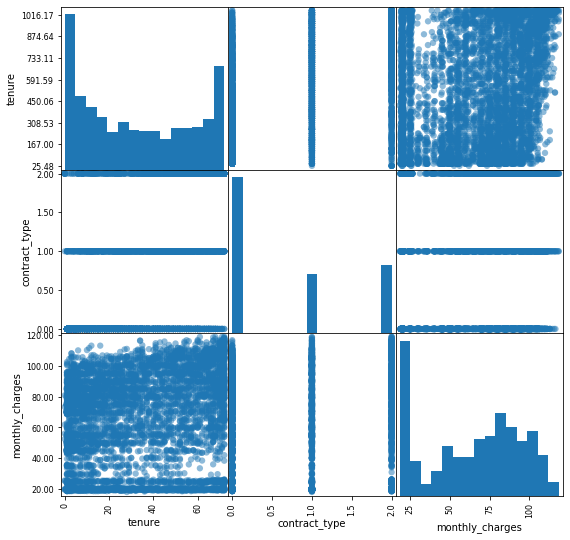

In [83]:
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter

cmap = cm.get_cmap('gnuplot')
axes = pd.plotting.scatter_matrix(
    train[['tenure', 'contract_type', 'monthly_charges']], marker='o', s=40,
    hist_kwds={'bins':15},  figsize=(9,9), cmap=cmap)
for ax in axes.flatten():
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))


# axes = pd.plotting.scatter_matrix(df, alpha=0.3, figsize=(9,9), diagonal='kde')
# for ax in axes.flatten():
#    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f')) 

Train Model

Create the Decision Tree Object

# for classification you can change the algorithm to gini or entropy (information gain).  Default is gini.


In [58]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)

Fit the model to the training data



In [59]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

Estimate Churn



In [61]:
y_pred = clf.predict(X_train)
y_pred[0:100]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Estimate the probability of a species

In [62]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba

array([[0.92582781, 0.07417219],
       [0.98369565, 0.01630435],
       [0.98369565, 0.01630435],
       ...,
       [0.92582781, 0.07417219],
       [0.58365385, 0.41634615],
       [0.58365385, 0.41634615]])

Evaluate Model

#Compute the Accuracy

#Accuracy: number of correct predictions over the number of total instances that have been evaluated.

In [63]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.78


Create a confusion matrix

True Positive: number of occurrences where y is true and y is predicted true.
True Negative: number of occurrences where y is false and y is predicted false.
False Positive: number of occurrences where y is false and y is predicted true.
False Negative: number of occurrences where y is true and y is predicted false.

In [64]:
confusion_matrix(y_train, y_pred)

array([[3477,  154],
       [ 921,  378]])

In [67]:
sorted(y_train.churn.unique())

[0, 1]

In [68]:
y_train.churn.value_counts()

0    3631
1    1299
Name: churn, dtype: int64

In [69]:
import pandas as pd

labels = sorted(y_train.churn.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,3477,154
1,921,378


Create a classification report

Precision: the higher this number is, the more you were able to pinpoint all positives correctly. If this is a low score, you predicted a lot of positives where there were none. tp / (tp + fp)
Recall: if this score is high, you didn’t miss a lot of positives. But as it gets lower, you are not predicting the positives that are actually there. tp / (tp + fn)
f1-score: The balanced harmonic mean of Recall and Precision, giving both metrics equal weight. The higher the F-Measure is, the better.
Support: number of occurrences of each class in where y is true.

In [70]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      3631
           1       0.71      0.29      0.41      1299

    accuracy                           0.78      4930
   macro avg       0.75      0.62      0.64      4930
weighted avg       0.77      0.78      0.75      4930



#Test Model

#Compute the accuracy of the model when run on the test data

In [72]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.78


In [73]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,online_security,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type
0,1,0,0,0,9,1,0,0,0,0,1,0,59.9,542.40,0,0
1,0,0,0,1,9,1,0,0,1,1,1,1,69.4,571.45,0,0
2,0,1,0,0,7,1,1,0,0,0,0,1,48.2,340.35,0,0
3,1,1,0,0,1,0,0,0,0,0,0,1,25.1,25.10,1,0
4,0,0,1,1,1,0,1,0,0,0,0,0,30.5,30.50,1,0
